In [146]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [147]:
ls german-traffic-signs

 Volume in drive D is Data
 Volume Serial Number is 784A-E480

 Directory of d:\Users\dhruv\documents\jupyterProjects\german-traffic-signs

13-06-2019  22:24    <DIR>          .
13-06-2019  22:24    <DIR>          ..
13-06-2019  22:24             1,043 signnames.csv
13-06-2019  22:24        38,888,118 test.p
13-06-2019  22:24       107,146,452 train.p
13-06-2019  22:24        13,578,712 valid.p
               4 File(s)    159,614,325 bytes
               2 Dir(s)  791,364,718,592 bytes free


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

In [149]:
np.random.seed(0)


In [150]:
with open('german-traffic-signs/test.p','rb') as f:
    test_data=pickle.load(f)
with open('german-traffic-signs/train.p','rb') as f:
    train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data=pickle.load(f)
    

In [151]:
print(type(test_data))

<class 'dict'>


In [152]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [153]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [154]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

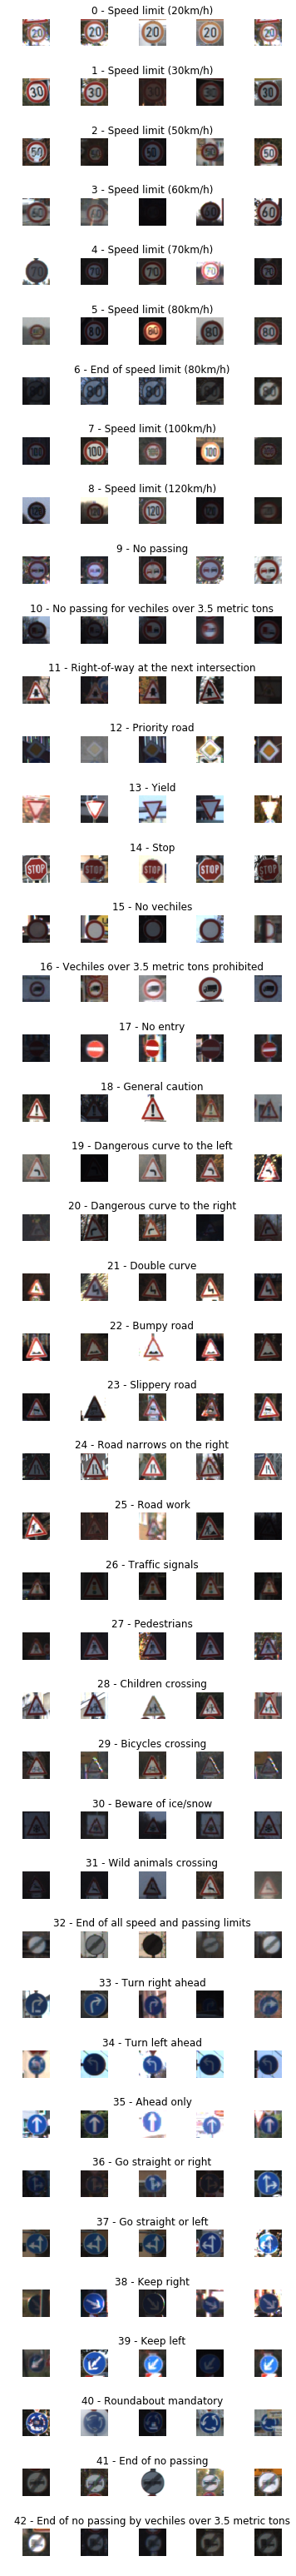

In [155]:
num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,43))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

In [156]:
print(X_train[1000].shape)

(32, 32, 3)


(32, 32, 3)
36


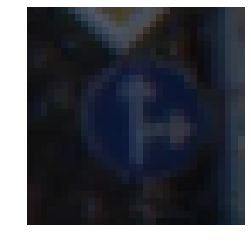

In [157]:
import cv2


img = X_train[1000]
plt.imshow(img)
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32, 3)
36


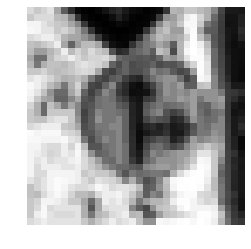

In [158]:

def greyscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

img =preprocess(X_train[1000]) 
plt.imshow(img,cmap='Greys')
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [159]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

In [160]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [161]:
print(X_train.shape)

(34799, 32, 32, 1)
